In [48]:
## IMPORT NECESSARY LIBRARIES
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, EfficientNetB0
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.image import resize



In [49]:
## LOADING THE IMAGE DATASET
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

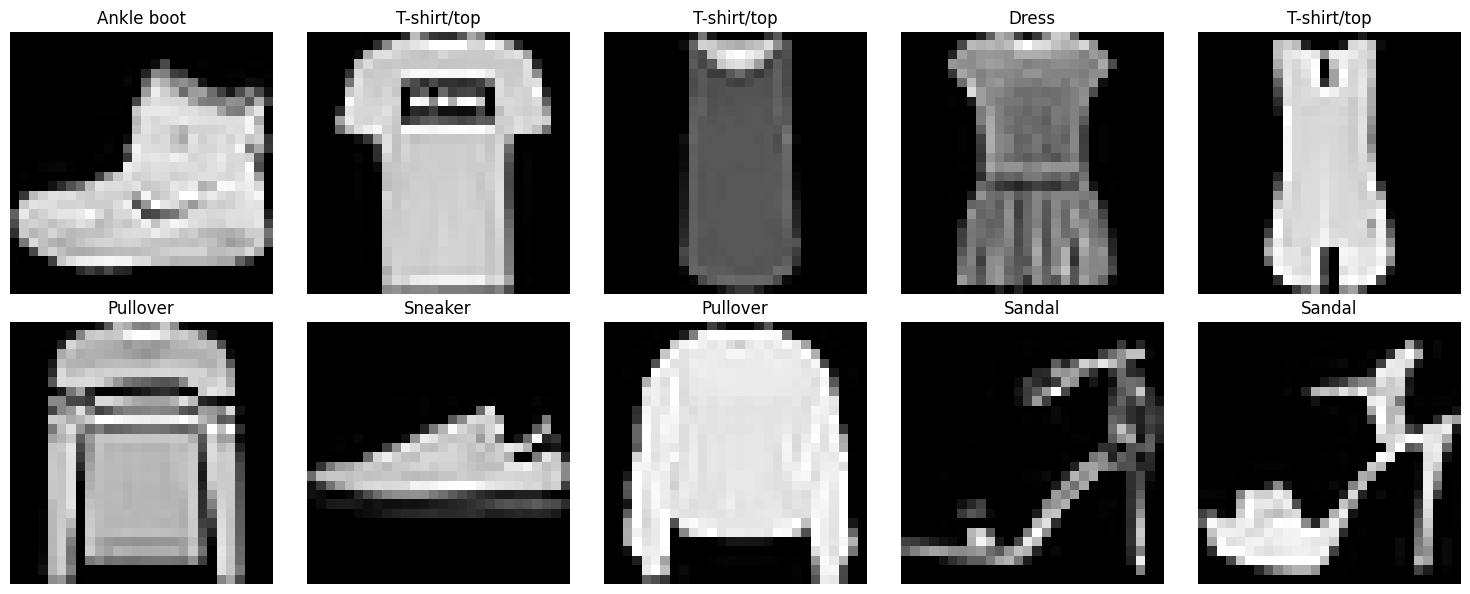

In [50]:
## VISUALIZING RAW IMAGES BEFORE PREPROCESSING

def plot_images(images, labels, num_rows=2, num_cols=5):

    class_names = [
        "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
        "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
    ]

    plt.figure(figsize=(15, 6))


    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
        plt.title(class_names[labels[i]])

    plt.tight_layout()
    plt.show()



plot_images(x_train, y_train)



In [51]:
## PREPROCESSING WITH NORMALIZING, RESHAPING TO INCLUDE A CHANNEL DIMENSION
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255




In [52]:
## RESHAPING THE IMAGES
x_train = np.expand_dims(x_train, axis=-1)  # Shape: (num_samples, 28, 28, 1)
x_test = np.expand_dims(x_test, axis=-1)

In [53]:
## ONE HOT ENCODING OF THE TARGET CLASSES
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


In [54]:
## DEFINING THE MODEL
model = Sequential([

    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),


    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),


    Flatten(),


    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(num_classes, activation='softmax')
])


In [55]:
## MODEL COMPILING
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [56]:
## TRAINING THE MODEL
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7220 - loss: 0.7510 - val_accuracy: 0.8644 - val_loss: 0.3686
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8582 - loss: 0.3918 - val_accuracy: 0.8855 - val_loss: 0.3125
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8736 - loss: 0.3438 - val_accuracy: 0.8920 - val_loss: 0.3004
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8930 - loss: 0.2934 - val_accuracy: 0.8970 - val_loss: 0.2795
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8970 - loss: 0.2802 - val_accuracy: 0.9002 - val_loss: 0.2713


In [57]:
## MODEL EVALUATION
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")
print(f"Test loss: {test_loss:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9003 - loss: 0.2777
Test accuracy: 0.90
Test loss: 0.27


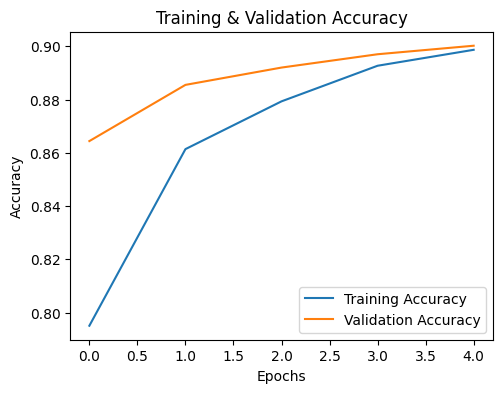

In [58]:
## PLOTTING THE TRAINING HISTORY

### ACCURACY PLOT
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()


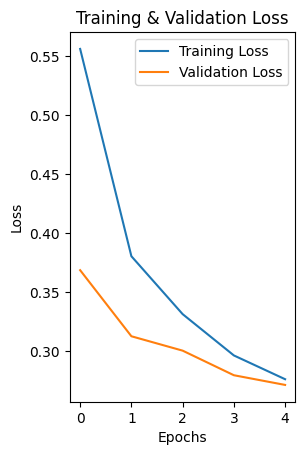

In [59]:
## LOSS PLOT
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.show()